**Venture Capital Market Insights Dashboard** using the provided venture capital funding data, follow these steps in Python, utilizing libraries such as pandas, numpy, matplotlib, and seaborn. Below is a structured approach that includes data preparation, exploratory data analysis (EDA), visualizations, and insights.

**Step 1**: **Data Preparation**
**Import Libraries**

In [ ]:
!pip install pandas matplotlib seaborn plotly


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


**Load the Dataset**:

In [ ]:
df = pd.read_csv('/content/Largest US Venture Funding Deals Of 2023.csv')


**Clean the Dataset**:
Handle missing values.
Remove dollar signs and commas from 'Amount' and 'Valuation' columns and convert them to numeric types.

In [ ]:
# Remove dollar signs and commas, convert to numeric
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Valuation'] = df['Valuation'].replace({'\$': '', ',': ''}, regex=True)  # Remove $ and ,
# Convert 'Valuation' to numeric, handling errors
df['Valuation'] = pd.to_numeric(df['Valuation'], errors='coerce')

# Handle missing values (e.g., fill with



**Parse 'Date Reported'**

In [ ]:
# Convert 'Date Reported' to datetime format
df['Date reported'] = pd.to_datetime(df['Date reported'])


**Step 2**: **Exploratory Data Analysis (EDA)**

**Funding Trends by Month/Year**:

In [ ]:
# Group by month/year and sum the funding amounts
funding_trends = df.resample('ME', on='Date reported')['Amount'].sum()


**Top 10 Funded Companies and Industries**:
**Most Active Lead Investors**

In [ ]:
top_companies = df.nlargest(10, 'Amount')[['Company', 'Amount']]
top_industries = df.groupby('Industry')['Amount'].sum().nlargest(10)
# Count investments by lead investors
active_investors = df['Lead investors'].value_counts().nlargest(10)


**Step 3**: **Visualizations**

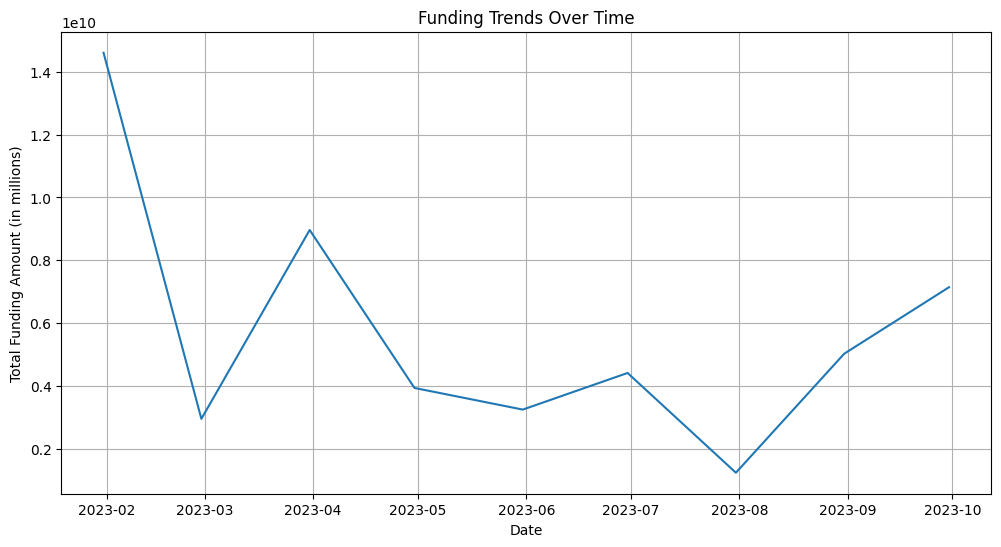

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(funding_trends.index, funding_trends.values)
plt.title('Funding Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Funding Amount (in millions)')
plt.grid()
plt.show()

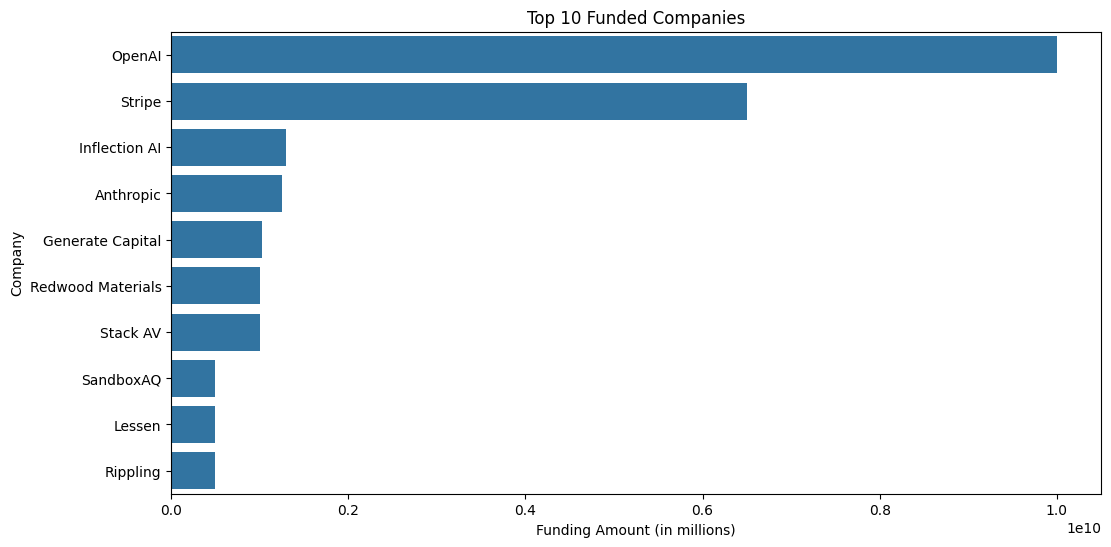

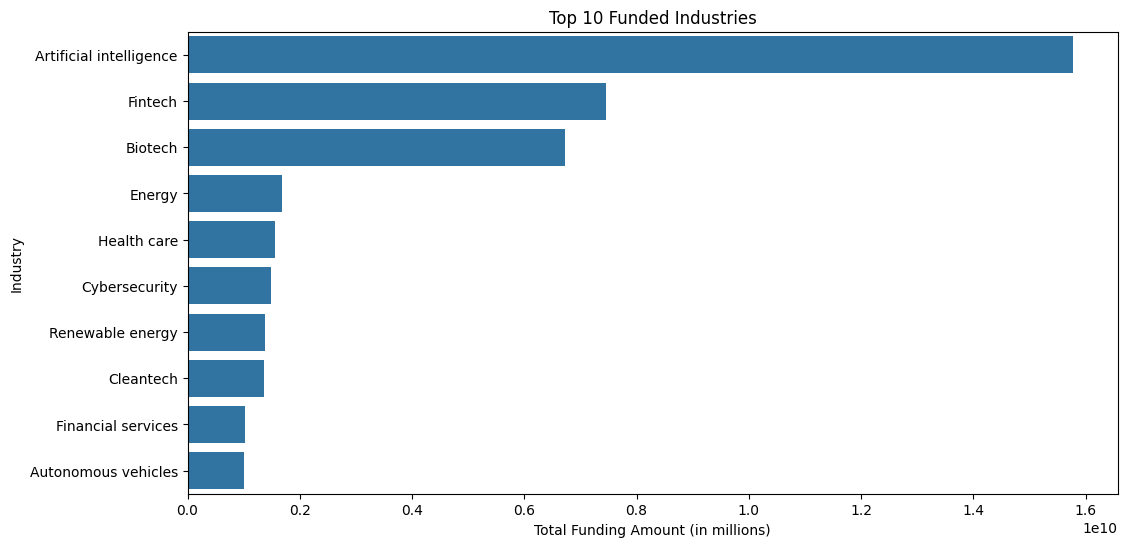

In [ ]:
# Top-Funded Companies
plt.figure(figsize=(12,6))
sns.barplot(x='Amount', y='Company', data=top_companies)
plt.title('Top 10 Funded Companies')
plt.xlabel('Funding Amount (in millions)')
plt.show()

# Top-Funded Industries
plt.figure(figsize=(12,6))
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title('Top 10 Funded Industries')
plt.xlabel('Total Funding Amount (in millions)')
plt.show()


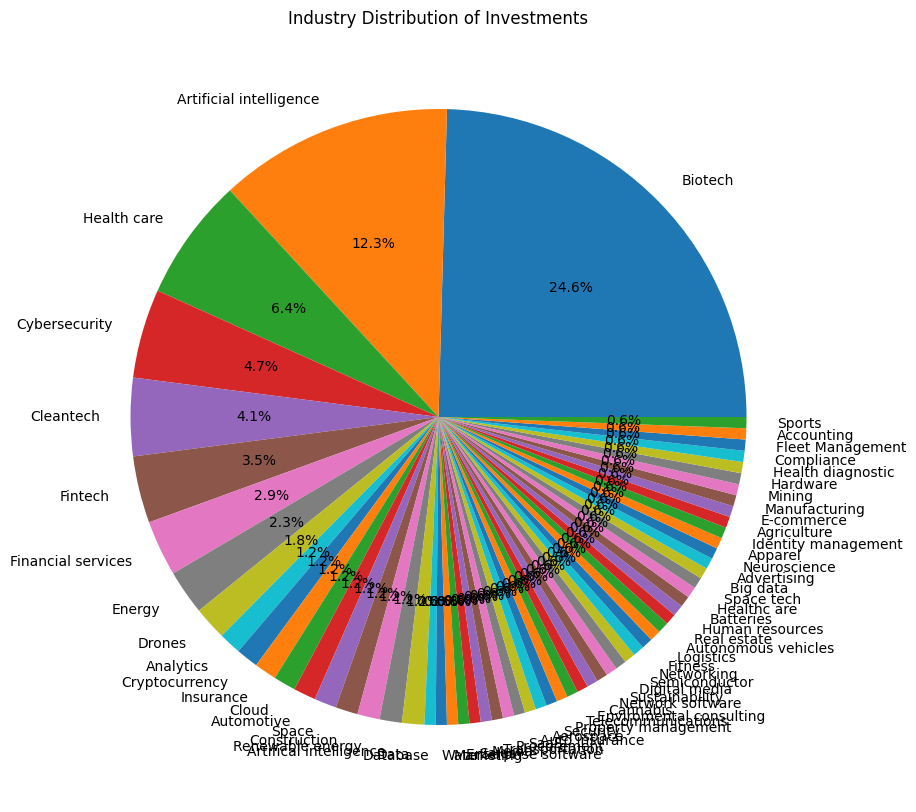

In [ ]:
plt.figure(figsize=(10,10))
industry_distribution = df['Industry'].value_counts()
plt.pie(industry_distribution, labels=industry_distribution.index, autopct='%1.1f%%')
plt.title('Industry Distribution of Investments')
plt.show()


**Insights** and
**Key Takeaways**:
Identify trends in funding over time, noting any spikes or declines.
Highlight the top companies receiving funding and the industries that attract the most investment.
Discuss the most active lead investors based on the number of investments.